<a href="https://colab.research.google.com/github/gyae/-25.11.20/blob/main/%22SWOT_bar_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ввод данных из таблицы:**

In [ ]:

'''Подготовка таблицы'''
!date
!pip -V
!pwd
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/drive')
!pip install --upgrade gspread
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
table = gc.open_by_key('1eNV_C3zQCza3Yyx_2rcpYGC9-h_2mejcxQIASyWwDTE')
print(table.worksheets())
print (dir(table))

Wed Jun 16 17:31:06 UTC 2021
pip 19.3.1 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
/content
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)
[<Worksheet 'Proceeds' id:1564650411>, <Worksheet 'SalaryInsurance' id:2000215357>, <Worksheet 'FixedAssets' id:1242655581>, <Worksheet 'CapitalСredit' id:1112471477>, <Worksheet 'Aside Prices' id:346906909>, <Worksheet 'Expenses' id:1409299421>, <Worksheet 'Raw' id:945680201>, <Worksheet 'Credits' id:349529397>, <Worksheet 'Diagram' id:1845067992>, <Worksheet 'Strenghts' id:153103749>, <Worksheet 'Weaknesses' id:1148361287>, <Worksheet 'Opportunities' id:1984485976>, <Worksheet 'Threats' id:1462044271>, <Worksheet 'Results' id:149698496>]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__'

**Прибыль:**

In [ ]:
'''Используем упрощеную систему налогооложения'''
'''--------------------------------------------'''
'''Планируемые доходы'''
worksheet = table.worksheet("Proceeds")
rows = worksheet.get_all_values()
#print(rows)
name = list()
price = list()
count = list()
value = list()
value_sh = list()
value_raw = list()
i=0
for row in rows:
  if(i>3):
    print (i, row)
    name.append(row[0])
    price.append(float(row[2]))
    count.append(int(row[3]))
    value.append(float(row[2])*int(row[3]))
    value_raw = list()
    value_raw.append(float(row[2])*int(row[3]))
    value_sh.append(value_raw)
  # print(value_raw, value_sh)
  i+=1
print(value_sh)
worksheet.update('E5:E100', value_sh)
print('\nworksheet.get_all_values()',worksheet.get_all_values())
print('\n',name, price, count, value, sep='\n', end='\n\n')
proceeds = sum(value)
print('Планируемые доходы в год составят:', proceeds)
print('Планируемые доходы в месяц составят:', proceeds // 12)

4 ['Пиво Светлое Нефильтрованное ', 'руб/0.4л', '200', '140000']
5 ['Пиво Тёмное Фильтрованное', 'руб/0.4л', '200', '100000']
6 ['Пиво Тёмное Неильтрованное', 'руб/0.4л', '200', '80000']
7 ['Арахисовый Эль', 'руб/0.4л', '320', '50000']
8 ['Пиво Кокосовое', 'руб/0.4л', '280', '70000']
9 ['Яблочный Сидр', 'руб/0.4л', '250', '40000']
10 ['Вишёвый Эль', 'руб/0.4л', '250', '40000']
11 ['Мохито', 'руб/0.2л', '250', '15000']
12 ['Виски-кола', 'руб/0.2л', '250', '25000']
13 ['Лонг-айленд', 'руб/0.2л', '250', '30000']
14 ['Пина-Колада', 'руб/0.2л', '250', '6000']
15 ['Кровавая Мэри', 'руб/0.2л', '250', '6000']
16 ['Джин-Тоник', 'руб/0.2л', '250', '9000']
17 ['Ягербомб', 'руб/0.2л', '350', '12000']
18 ['Куба-либре', 'руб/0.2л', '250', '12000']
19 ['Глинтвейн', 'руб/0.3л', '360', '16000']
20 ['Виски', 'руб/0.04л', '380', '40000']
21 ['Ром Бакарди', 'руб/0.04л', '320', '35000']
22 ['Вино Красное Сухое', 'руб/0.7л', '1800', '20000']
23 ['Вино Белое Сухое', 'руб/0.75л', '1900', '19000']
24 ['Пиво Бе

**Затраты:**

In [ ]:
worksheet = table.worksheet("SalaryInsurance")
rows = worksheet.get_all_values()
#print(rows)
name = list()
permanent_salary = list()
percentage_of_revenue = list()
insurance= list()
i = 0 
for row in rows:
  if(i>2):
    print (i, row)
    name.append(row[0])
    permanent_salary.append(float(row[1]))
    percentage_of_revenue.append(float(row[2]))
    insurance.append(float(row[3]))
  i+=1
print('\n', name, permanent_salary, percentage_of_revenue, insurance, sep='\n', end='\n\n')
print('Выручка: ',proceeds)
all_permanent_salary = 12 *sum(permanent_salary)
print('Постоянная составляющая зарплаты:', all_permanent_salary) 
all_variable_salary =  proceeds*(sum(percentage_of_revenue))/100
print('Переменная составляющая зарплаты', all_variable_salary)
all_salary = all_permanent_salary + all_variable_salary 
print('Зарплата (постоянная + переменная), в тч НДФЛ: ', all_salary)
insurance = insurance[0]*all_salary/100
print('Страховые взносы', insurance)
personnel_costs = all_salary + insurance
print('Планируемая зарплата и страховые взносы:', personnel_costs)

3 ['Директор', '45000', '1', '30', '13']
4 ['Бармен', '35000', '5', '30', '13']
5 ['Администратор', '40000', '0.5', '30', '13']
6 ['Официант 1', '30000', '0.5', '30', '13']
7 ['Официант 2', '30000', '0.5', '30', '13']
8 ['Бухгалтер', '30000', '0.5', '30', '13']


['Директор', 'Бармен', 'Администратор', 'Официант 1', 'Официант 2', 'Бухгалтер']
[45000.0, 35000.0, 40000.0, 30000.0, 30000.0, 30000.0]
[1.0, 5.0, 0.5, 0.5, 0.5, 0.5]
[30.0, 30.0, 30.0, 30.0, 30.0, 30.0]

Выручка:  295260000.0
Постоянная составляющая зарплаты: 2520000.0
Переменная составляющая зарплаты 23620800.0
Зарплата (постоянная + переменная), в тч НДФЛ:  26140800.0
Страховые взносы 7842240.0
Планируемая зарплата и страховые взносы: 33983040.0


In [ ]:
'''Основные средства'''
worksheet = table.worksheet("FixedAssets")
rows = worksheet.get_all_values()
#print(rows)
name = list()
price = list()
count = list()
value = list()
i=0
for row in rows:
  if(i>3):
    print (i, row)
    name.append(row[1])
    price.append(float(row[2]))
    count.append(int(row[3]))
    value.append(float(row[2])*int(row[3]))
  i+=1
print('\n', name, price, count, value, sep='\n', end='\n\n')
FixedAssets_Cost = sum(value)
print('Основные средства:', FixedAssets_Cost)

4 ['В основном зале', 'Барные стулья', '3000', '5']
5 ['В основном зале', 'Столик', '7800', '5']
6 ['В основном зале', 'Стулья обычные', '1500', '20']
7 ['В основном зале', 'Декор', '100000', '1']
8 ['В основном зале', 'Инструменты для уборки помещения', '400', '1']
9 ['В основном зале', 'Ремонт', '150000', '1']
10 ['В основном зале', 'Неоновая подсветка', '20000', '1']
11 ['В основном зале', 'Освещение', '50000', '1']
12 ['В основном зале', 'Барный шкаф с красивыми бутылками', '16000', '1']
13 ['В основном зале', 'Вся посуда', '30000', '1']
14 ['В основном зале', 'Кассовый аппарат', '14000', '1']
15 ['В комнате администратора', 'Стол', '3700', '1']
16 ['В комнате администратора', 'Компьютер', '30000', '1']
17 ['В комнате администратора', 'Принтер', '3500', '1']
18 ['В комнате администратора', 'Стул', '1500', '3']
19 ['В комнате администратора', 'Инструменты для уборки помещения', '400', '2']


['Барные стулья', 'Столик', 'Стулья обычные', 'Декор', 'Инструменты для уборки помещения', '

In [ ]:
'''Уставной капитал, кредит'''
worksheet = table.worksheet("CapitalСredit")
rows = worksheet.get_all_values()
#print(rows)
name = list()
value = list()
i=0
for row in rows:
  if(i>3):
    print (i, row)
    name.append(row[0])
    value.append(float(row[1]))
  i+=1
capital = value[0]
print(name[0], capital)
credit = value[1]
print(name[1], credit)
percent = value[2]
print(name[2], percent)
cost_of_credit = credit*percent/100
print('Годовая стоимость кредита составит: ',cost_of_credit)


4 ['Уставной капитал, руб', '2000000']
5 ['Величина кредита, руб', '1000000']
6 ['Годовая процентная ставка, %', '9']
Уставной капитал, руб 2000000.0
Величина кредита, руб 1000000.0
Годовая процентная ставка, % 9.0
Годовая стоимость кредита составит:  90000.0


In [ ]:
'''Текущие расходы'''
worksheet = table.worksheet("Expenses")
rows = worksheet.get_all_values()
#print(rows)
name = list()
value = list()
i=0
for row in rows:
  if(i>0) and (i<12):
    print (i, row)
    name.append(row[0])
    value.append(float(row[1]))
  i+=1
current_expensis = sum(value)
print('Текущие расходы в течение года: : ', current_expensis)
print('Текущие расходы в течение месяца: : ', current_expensis//12)

1 ['Аренда помещения', '40000']
2 ['Коммунальные платежи', '9000']
3 ['Расходники для работы', '5000']
4 ['Сигнализация', '10000']
5 ['Реклама', '15000']
6 ['Канцтовары', '2000']
7 ['Банковское обслуживание', '5000']
8 ['Поставка пива', '1387000']
9 ['Поставка вина', '1950000']
10 ['Поставка крепких напитков', '2000000']
11 ['Поставка безалкогольных напитков', '100000']
Текущие расходы в течение года: :  5523000.0
Текущие расходы в течение месяца: :  460250.0


In [ ]:
'''Налоги и прибыль'''
print('Планируемые доходы составят:', proceeds)
print('Затраты на зарплату в том числе страховые взносы  составят :', personnel_costs)
print('Стоимость основных средств составит:', FixedAssets_Cost)
print('Годовая стоимость кредита составит: ',cost_of_credit)
print('Текущие расходы в течение года: ',current_expensis)
incom_expenses = proceeds - personnel_costs - FixedAssets_Cost - cost_of_credit - current_expensis
print('Доходы - Расходы:', incom_expenses)
income_tax = 15 # налог на прибыль, %
value_of_income_tax = income_tax * incom_expenses / 100.
print ('Налог  на прибыль составит: ', value_of_income_tax )
print ('Чистая прибыль составит : ', incom_expenses - value_of_income_tax )

Планируемые доходы составят: 295260000.0
Затраты на зарплату в том числе страховые взносы  составят : 33983040.0
Стоимость основных средств составит: 506900.0
Годовая стоимость кредита составит:  77000.0
Текущие расходы в течение года:  5523000.0
Доходы - Расходы: 255170060.0
Налог  на прибыль составит:  38275509.0
Чистая прибыль составит :  216894551.0


**Рассчёт наиболее выгодного кредита:**

In [ ]:
worksheet = table.worksheet('Credits')
rows = worksheet.get_all_values()

i=0
min = 100
lps = '' #лучшая процентная ставка
for row in rows:
  if(i<5 and i>1):
    if (float(row[3]) < min) :
      min=float(row[3])
      lps=row[0]
  i+=1
print('Лучшая процентная ставка у банка: ',lps)

i=0
max = 0
lsk = '' #лучшая сумма кредита
for row in rows:
  if(i<5 and i>1):
    if (float(row[2]) > max) :
      max=float(row[2])
      lsk=row[0]
  i+=1
print('Лучшая сумма кредита у банка: ',lsk)

i=0
max2 = 0
msk = 0 #максимальный срок кредита
for row in rows:
  if(i<5 and i>1):
    if (float(row[6]) > max2) :
      max2=float(row[6])
      msk=row[0]
  i+=1
print('Максимальный срок кредита у банка: ',msk)

Лучшая процентная ставка у банка:  ВТБ
Лучшая сумма кредита у банка:  Тинькофф
Максимальный срок кредита у банка:  Тинькофф


**Сильные стороны:**

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)

РАБОТА С ТАБЛИЦЕЙ
total 264
-rw------- 1 root   151 Jun 16 17:31  bar.gsheet
-rw------- 1 root 29689 Apr 14 17:45  bar.xlsx
drwx------ 2 root  4096 Oct 30  2020 'Colab Notebooks'/
-rw------- 1 root   151 Jun 16 17:32  fin_swot_bar.gsheet
-rw------- 1 root 12432 Mar  3 21:13  soundgraph.png
-rw------- 1 root   151 Apr 12 12:19  studio.gsheet
-rw------- 1 root 29689 Apr 14 17:44  studio.xlsx
-rw------- 1 root   151 Mar  3 21:11  swot_sound.gsheet
-rw------- 1 root   151 Feb 23 12:58  Бар.gsheet
-rw------- 1 root 93413 Jun 16 17:17  Бар.xlsx
-rw------- 1 root 93413 Jun 16 17:19 'Копия Бар2.xlsx'
drwx------ 2 root  4096 Apr 20 15:58  Семики/
1 ['Дружелюбный персонал', 'Вежливые сотрудники, которые смогут быстро найти подход к любому клиенту', '8', '0.90', '7,2', '37.45']
2 ['Уютный интерьер', 'Приятный интереьер в баре позволит клиентам комфортно проводить время', '8', '0.9', '7,2', '']
3 ['Качествен

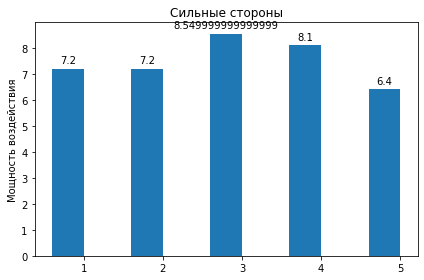

1 - Дружелюбный персонал
2 - Уютный интерьер
3 - Качественные напитки
4 - Маркейтинг
5 - Расположение


In [ ]:
import os
import time
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from oauth2client.client import GoogleCredentials
print('\nРАБОТА С ТАБЛИЦЕЙ')
%ll -lAF /content/drive/MyDrive/
gs = gspread.authorize(GoogleCredentials.get_application_default())
os.stat('/content/drive/MyDrive/fin_swot_bar.gsheet')
table = gs.open_by_key('1eNV_C3zQCza3Yyx_2rcpYGC9-h_2mejcxQIASyWwDTE')
worksheet = table.worksheet('Strengths')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3])) #считается сила
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
strengths_sum = sum(power)
print('Суммарная сила сильных сторон:', strengths_sum)
worksheet.update('F2', strengths_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols: #добавление значений name
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  #ширина колонок
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Сильные стороны')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    #Добавление значений над диграммами
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) #значения над колонками
fig.tight_layout()
plt.show()              
j=0
for col in cols: #печать обозначений под диаграммой
  if(j>0):
    print(j, '-', col)
  j+=1

**Слабые стороны:**

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)

РАБОТА С ТАБЛИЦЕЙ
total 163
drwx------ 2 root   4096 Oct 30 08:28 'Colab Notebooks'/
-rw------- 1 root  12432 Mar  3 21:13  soundgraph.png
-rw------- 1 root    151 Mar 26 07:42  studio.gsheet
-rw------- 1 root  28987 Mar 26 07:23  studio.xlsx
-rw------- 1 root    151 Mar  3 21:11  swot_sound.gsheet
-rw------- 1 root    151 Nov 21 16:45  textpy.gdoc
-rw------- 1 root    151 Feb 23 12:58  Бар.gsheet
-rw------- 1 root 118328 Mar  8 15:34  снилс.pdf
1 ['Конкуренция', 'Большая конкуренция на рынке', '7', '0.5', '3.5', '9.3']
2 ['Отключение электричества', 'Остановит работу всей студии', '10', '0.05', '0.5', '']
3 ['Клиенты', 'Отсутсвие постоянных клиентов', '5', '0.4', '2', '']
4 ['Репутация предприятия', 'Репутация предприятия ещё не сформирована', '7', '0.4', '2.8', '']
5 ['Пропадёт интерес к музыке', 'Спрос на запись музыки может резко упасть', '10', '0.05', '0.5', '']


['Конкуренция', 'Отключение

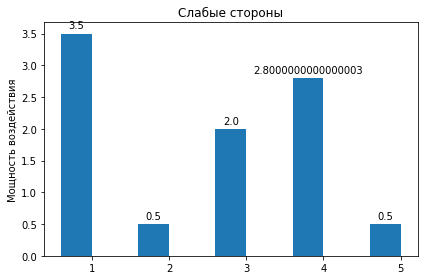

1 - Конкуренция
2 - Отключение электричества
3 - Клиенты
4 - Репутация предприятия
5 - Пропадёт интерес к музыке


In [ ]:
import os
import time
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from oauth2client.client import GoogleCredentials
print('\nРАБОТА С ТАБЛИЦЕЙ')
%ll -lAF /content/drive/MyDrive/
gs = gspread.authorize(GoogleCredentials.get_application_default())
os.stat('/content/drive/MyDrive/studio.gsheet')
table = gs.open_by_key('1s9N7lvuJoOZC2Vv6u-I3Cibq5LEohgl7nbx4F7durMw')
worksheet = table.worksheet('Weaknesses')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3])) #считается сила
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
weaknesses_sum = sum(power)
print('Суммарная сила слабых сторон:', weaknesses_sum)
worksheet.update('F2', weaknesses_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols: #добавление значений name
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  #ширина колонок
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Слабые стороны')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    #Добавление значений над диграммами
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) #значения над колонками
fig.tight_layout()
plt.show()              
j=0
for col in cols: #печать обозначений под диаграммой
  if(j>0):
    print(j, '-', col)
  j+=1

**Возможности:**

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)

РАБОТА С ТАБЛИЦЕЙ
total 193
-rw------- 1 root    151 Apr 14 20:51  bar.gsheet
-rw------- 1 root  29689 Apr 14 20:45  bar.xlsx
drwx------ 2 root   4096 Oct 30 11:28 'Colab Notebooks'/
-rw------- 1 root  12432 Mar  4 00:13  soundgraph.png
-rw------- 1 root    151 Apr 12 15:19  studio.gsheet
-rw------- 1 root  29689 Apr 14 20:44  studio.xlsx
-rw------- 1 root    151 Mar  4 00:11  swot_sound.gsheet
-rw------- 1 root    151 Nov 21 19:45  textpy.gdoc
-rw------- 1 root    151 Feb 23 15:58  Бар.gsheet
-rw------- 1 root 118328 Mar  8 18:34  снилс.pdf
1 ['Сделать клиентов постоянными', 'Приятные условия в баре и качественные напитки сделают клиентов постоянными  ', '9', '0.8', '7.2', '33.1']
2 ['Организация различных событий', 'Интересные события помогут завлечь новых клиентов', '9', '1', '9', '']
3 ['Бонусы за привлечение друзей', 'Бонусы и скидки за привлечение друзей помогут сохранить старых клиентов и 

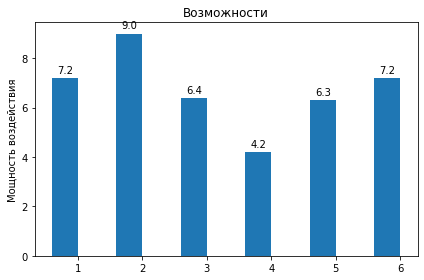

1 - Сделать клиентов постоянными
2 - Организация различных событий
3 - Бонусы за привлечение друзей
4 - Неоновые вывески
5 - Реклама через инстаграм
6 - Разнообразие


In [ ]:
import os
import time
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from oauth2client.client import GoogleCredentials
print('\nРАБОТА С ТАБЛИЦЕЙ')
%ll -lAF /content/drive/MyDrive/
gs = gspread.authorize(GoogleCredentials.get_application_default())
os.stat('/content/drive/MyDrive/bar.gsheet')
table = gs.open_by_key('1dXUHvVAn_PwrBNk9Kz2IQWvNr6GJ__ZVEQ2ZVkH6Q3w')
worksheet = table.worksheet('Opportunities')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3])) #считается сила
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
opportunities_sum = sum(power)
print('Суммарная сила возможностей:', opportunities_sum)
worksheet.update('F2', opportunities_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols: #добавление значений name
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  #ширина колонок
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Возможности')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    #Добавление значений над диграммами
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) #значения над колонками
fig.tight_layout()
plt.show()              
j=0
for col in cols: #печать обозначений под диаграммой
  if(j>0):
    print(j, '-', col)
  j+=1

**Угрозы:**

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)

РАБОТА С ТАБЛИЦЕЙ
total 193
-rw------- 1 root    151 Apr 14 20:51  bar.gsheet
-rw------- 1 root  29689 Apr 14 20:45  bar.xlsx
drwx------ 2 root   4096 Oct 30 11:28 'Colab Notebooks'/
-rw------- 1 root  12432 Mar  4 00:13  soundgraph.png
-rw------- 1 root    151 Apr 12 15:19  studio.gsheet
-rw------- 1 root  29689 Apr 14 20:44  studio.xlsx
-rw------- 1 root    151 Mar  4 00:11  swot_sound.gsheet
-rw------- 1 root    151 Nov 21 19:45  textpy.gdoc
-rw------- 1 root    151 Feb 23 15:58  Бар.gsheet
-rw------- 1 root 118328 Mar  8 18:34  снилс.pdf
1 ['Кризис', 'Экономический кризис снизит спрос', '10', '0.2', '2', '11.1']
2 ['Конкуренция', 'Большое кол-во конкурентов в городе, особенно в центре', '9', '0.7', '6.3', '']
3 ['Постоянные клиенты у конкурентов', 'Часть людей уже имеют любимый бар, который не захотят менять', '8', '0.2', '1.6', '']
4 ['Грубые клиенты', 'Могут прийти грубые клиенты, которые б

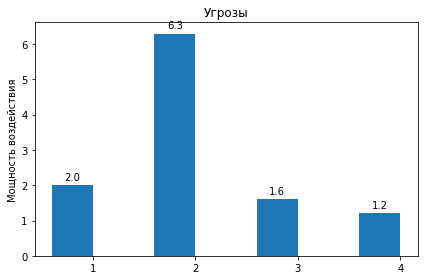

1 - Кризис
2 - Конкуренция
3 - Постоянные клиенты у конкурентов
4 - Грубые клиенты


In [ ]:
import os
import time
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from oauth2client.client import GoogleCredentials
print('\nРАБОТА С ТАБЛИЦЕЙ')
%ll -lAF /content/drive/MyDrive/
gs = gspread.authorize(GoogleCredentials.get_application_default())
os.stat('/content/drive/MyDrive/bar.gsheet')
table = gs.open_by_key('1dXUHvVAn_PwrBNk9Kz2IQWvNr6GJ__ZVEQ2ZVkH6Q3w')
worksheet = table.worksheet('Threats')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3])) #считается сила
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
threats_sum = sum(power)
print('Суммарная сила угроз:', threats_sum)
worksheet.update('F2', threats_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols: #добавление значений name
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  #ширина колонок
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Угрозы')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    #Добавление значений над диграммами
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) #значения над колонками
fig.tight_layout()
plt.show()              
j=0
for col in cols: #печать обозначений под диаграммой
  if(j>0):
    print(j, '-', col)
  j+=1

**Общий результат:**

Результат: 55.35


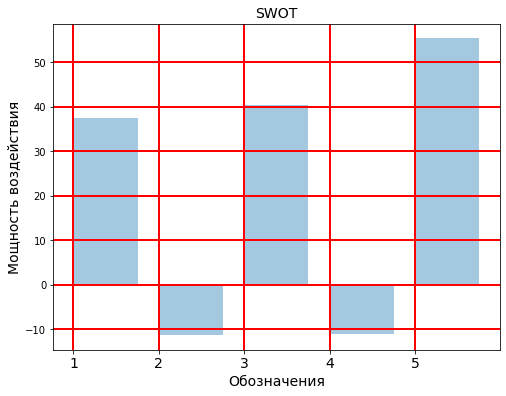

1  -  Сильные стороны
2  -  Слабые стороны
3  -  Возможности
4  -  Угорозы
5  -  Результат


In [ ]:
#копирование значений силы из листов
worksheet = table.worksheet('Strengths')
strengths_power = worksheet.acell('F2').value
worksheet = table.worksheet('Weaknesses')
weaknesses_power = worksheet.acell('F2').value
worksheet = table.worksheet('Opportunities')
opportunities_power = worksheet.acell('F2').value
worksheet = table.worksheet('Threats')
threats_power = worksheet.acell('F2').value
#добавление в таблицу result
worksheet = table.worksheet('Result')
worksheet.update('A1', 'Суммарная сила сильных сторон')
worksheet.update('A2', strengths_power)
worksheet.update('B1', 'Суммарная сила слабых сторон') 
worksheet.update('B2', weaknesses_power)
worksheet.update('A4', 'Суммарная сила возможностей') 
worksheet.update('A5', opportunities_power)
worksheet.update('B4', 'Суммарная сила угроз') 
worksheet.update('B5', threats_power)
#подсчет результата анализа и добавление его в таблицу
result = float(strengths_power) - 1*float(weaknesses_power) + float(opportunities_power) - 1*float(threats_power)
print('Результат:', result)
worksheet = table.worksheet('Result')
worksheet.update('A7', 'Результат')
worksheet.update('A8', result)
#создание графика
def matplot(element):
    import matplotlib.pyplot as plt
    x=list()
    x_float=list()
    title=list()
    y_float=list()
x_float = [1, 2, 3, 4, 5]
y_float = [float(strengths_power), -1*float(weaknesses_power), float(opportunities_power), -1*float(threats_power),  result]
title = [ "Сильные стороны", "Слабые стороны", "Возможности", "Угорозы", "Результат"]
x_pos=list()
i=0
for i in range(x_float.__len__()):
  x_pos.append(i)

fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('SWOT', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)
plt.show()
#печать заголовков
for i in range(title.__len__()):
  print(i+1, " - ", title[i])
  i += 1